In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import

In [2]:
# ! nvidia-smi
# !pip install tensorflow-gpu
# !pip install pyyaml h5py

In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
# import tensorflow_docs as tfdocs
# import tensorflow_docs.modeling
# import tensorflow_docs.plots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Activation, Dense, Flatten,AveragePooling1D, Conv1D, MaxPooling1D, LSTM, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.utils import shuffle 
from tensorflow.keras import regularizers
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2,l1
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.metrics import categorical_crossentropy
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import itertools
# import re
from  IPython import display
import random
import pathlib
import shutil
import tempfile
from functools import lru_cache
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

##Data

In [67]:
train_path = "/content/drive/MyDrive/Thesis/cmpl_data/train.csv"
test_path = "/content/drive/MyDrive/Thesis/cmpl_data/bTest.csv"
df = pd.read_csv(train_path)
pf = pd.read_csv(test_path)

In [68]:
# # check the individual character
# def has(matrix):
#     max_value=0
#     for i in range (0,len(matrix)):
#         if (len(matrix[i])>max_value):
#             max_value=len(matrix[i])
#     vectorSize=max_value
#     print('v',vectorSize)
#     count = 0
#     for i in range(len(matrix)):
#         for j in range (0, len(matrix[i])):
#             if (matrix[i][j]=='Z'):
#                 count += 1
#     return count  
# d = df['seq'].values.ravel()
# # p = pf['seq'].values.ravel()
# # v = vf['seq'].values.ravel()
# d = has(d)
# # p = has(p)
# # v = has(v)
# # print('d:',d,'p:',p,'v:',v)
# print('d:',d)

In [69]:
def seq_conversion(matrix):
    # n = [1,2,3,4] #5
    r = [3,4]
    y = [1,2] #5 
    k = [2,3] #5
    m = [1,4]
    s = [1,3]
    w = [2,4] #5
    b = [1,2,3] #5
    h = [1,2,4]
    d = [2,3,4] #5
    v = [1,3,4]
    
    vectorSize= 29922
    # A:4, G:3, C:1, T:2 U:5
    out_data=[]
    for i in range (len(matrix)):
        sample=np.zeros(vectorSize)
        for j in range (0, len(matrix[i])):
            if(matrix[i][j]=='C'):
              sample[j]=1
            elif(matrix[i][j]=='T'):
              sample[j]=2
            elif(matrix[i][j]=='G'):
              sample[j]=3
            elif(matrix[i][j]=='A'):
              sample[j]=4
            # elif(matrix[i][j]=='U'):
            #   sample[j]=5
            # elif(matrix[i][j]=='N'):
            #   sample[j]=0
            elif(matrix[i][j]=='R'):
              sample[j]=random.choice(r)
            elif(matrix[i][j]=='Y'):
              sample[j]=random.choice(y)
            elif(matrix[i][j]=='K'):
              sample[j]=random.choice(k)
            elif(matrix[i][j]=='M'):
              sample[j]=random.choice(m)
            elif(matrix[i][j]=='S'):
              sample[j]=random.choice(s)
            elif(matrix[i][j]=='W'):
              sample[j]=random.choice(w)
            elif(matrix[i][j]=='B'):
              sample[j]=random.choice(b) 
            elif(matrix[i][j]=='H'):
              sample[j]=random.choice(h) 
            elif(matrix[i][j]=='D'):
              sample[j]=random.choice(d) 
            elif(matrix[i][j]=='V'):
              sample[j]=random.choice(v) 
                
            else:
              sample[j] = 0
        out_data.append(sample)
    return out_data

In [70]:
# train_data,train_label = df['seq'],df['variant_label']
# test_data,test_label = pf['seq'],pf['variant_label']

def formating_data(data,label,test_size=.2):
  train_data,valid_data,train_label,valid_label = train_test_split(data,label,test_size=test_size,random_state=230)
  # Train data conversion
  train_data  = train_data.values.ravel()
  train_data = np.asarray(seq_conversion(train_data), dtype=np.float32)                      
  train_label = train_label.to_numpy().astype('int8')
  # Test data conversion
  valid_data  = valid_data.values.ravel()
  valid_data = np.asarray(seq_conversion(valid_data), dtype=np.float32)                      
  valid_label = valid_label.to_numpy().astype('int8')
  # Shuffle the train_sample and test_sample
  train_data, train_label = shuffle(train_data, train_label)
  valid_data, valid_label = shuffle(valid_data, valid_label)
  # Scaled data
  train_data = train_data/4
  valid_data = valid_data/4
  # Change the dimension for model purpose
  # train_data = np.expand_dims(train_data, -1)
  # test_data = np.expand_dims(test_data, -1)
  return train_data,valid_data,train_label,valid_label

In [71]:
 # Test data conversion
test_data  = pf['seq'].values.ravel()
test_data = np.asarray(seq_conversion(test_data), dtype=np.float32)                      
test_label = pf['variant_label'].to_numpy().astype('int8')
test_data, test_label = shuffle(test_data, test_label)
test_data = test_data/4

In [72]:
data = df['seq']
label = df['variant_label']

##LinearRegeression

In [ ]:
df0 = df[df['variant_label']==0]
df1 = df[df['variant_label']==1]
df0 = df0.append(df1)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.6976999615526412

In [ ]:
df0 = df[df['variant_label']==0]
df2 = df[df['variant_label']==2]
df0 = df0.append(df2)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.8863191622626921

In [ ]:
df0 = df[df['variant_label']==0]
df3 = df[df['variant_label']==3]
df0 = df0.append(df3)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9659987952195053

In [ ]:
df1 = df[df['variant_label']==1]
df2 = df[df['variant_label']==2]
df1 = df1.append(df2)
train_data,test_data,train_label,test_label = formating_data(df1['seq'],df1['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.8200715403463463

In [ ]:
df1 = df[df['variant_label']==1]
df3 = df[df['variant_label']==3]
df1 = df1.append(df3)
train_data,test_data,train_label,test_label = formating_data(df1['seq'],df1['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9393682578168749

In [ ]:
df2 = df[df['variant_label']==2]
df3 = df[df['variant_label']==3]
df2 = df2.append(df3)
train_data,test_data,train_label,test_label = formating_data(df2['seq'],df2['variant_label'])
# Linear Regression
clr = LinearRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9648652847424594

##LogisticRegression

In [ ]:
df0 = df[df['variant_label']==0]
df1 = df[df['variant_label']==1]
df0 = df0.append(df1)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.952

In [ ]:
df0 = df[df['variant_label']==0]
df2 = df[df['variant_label']==2]
df0 = df0.append(df2)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9773333333333334

In [ ]:
df0 = df[df['variant_label']==0]
df3 = df[df['variant_label']==3]
df0 = df0.append(df3)
train_data,test_data,train_label,test_label = formating_data(df0['seq'],df0['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9906666666666667

In [ ]:
df1 = df[df['variant_label']==1]
df2 = df[df['variant_label']==2]
df1 = df1.append(df2)
train_data,test_data,train_label,test_label = formating_data(df1['seq'],df1['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9746666666666667

In [ ]:
df1 = df[df['variant_label']==1]
df3 = df[df['variant_label']==3]
df1 = df1.append(df3)
train_data,test_data,train_label,test_label = formating_data(df1['seq'],df1['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.984

In [ ]:
df2 = df[df['variant_label']==2]
df3 = df[df['variant_label']==3]
df2 = df2.append(df3)
df2.loc[df2['variant_label']==2,'variant_label']=1
df2.loc[df2['variant_label']==3,'variant_label']=0
train_data,test_data,train_label,test_label = formating_data(df2['seq'],df2['variant_label'])
clr = LogisticRegression()
clr.fit(train_data,train_label)
clr.score(test_data,test_label)

0.9906666666666667

In [11]:
# train_data,valid_data,train_label,valid_label = formating_data(df['seq'],df['variant_label'],test_size=0.2)
clr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clr.fit(train_data,train_label)
# clr.score(test_data,test_label)
pred = clr.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       500
           1       0.91      0.91      0.91       500
           2       0.93      0.94      0.94       500
           3       0.99      0.95      0.97       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [24]:
pred = clr.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       500
           1       0.91      0.91      0.91       500
           2       0.93      0.94      0.94       500
           3       0.99      0.95      0.97       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [82]:
clr.score(test_data,test_label)

0.8912228057014253

In [15]:
clr.score(valid_data,valid_label)

0.9341666666666667

In [83]:
scores = cross_val_score(clr, test_data, test_label, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.90125    0.9175     0.92125    0.9175     0.90738423]
Average cross-validation score: 0.912976846057572


In [84]:
scores = cross_val_score(clr, test_data, test_label, cv=5, scoring='f1_macro')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.90128891 0.91765771 0.92137116 0.91766677 0.90735576]
Average cross-validation score: 0.9130680604220187


##SVM

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [73]:
train_data,valid_data,train_label,valid_label = formating_data(df['seq'],df['variant_label'],test_size=0.2)

In [40]:
lin = SVC(kernel='linear',random_state=1).fit(train_data, train_label)
# lin.score(test_data,test_label)
pred = lin.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       500
           1       0.95      0.96      0.95       500
           2       0.98      0.96      0.97       500
           3       0.99      0.98      0.98       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [41]:
lin.score(test_data,test_label)

0.9665

In [44]:
lin.score(valid_data,valid_label)

0.9591666666666666

In [45]:
scores = cross_val_score(lin, valid_data, valid_label, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.875      0.90833333 0.9375     0.925      0.92083333]
Average cross-validation score: 0.9133333333333333


In [46]:
scores = cross_val_score(lin, valid_data, valid_label, cv=5, scoring='f1_macro')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.8764271  0.90888228 0.9377566  0.92540274 0.92138894]
Average cross-validation score: 0.9139715317894641


In [47]:
rbf = SVC(kernel='rbf',random_state=1).fit(train_data, train_label)
# rbf.score(test_data,test_label)
pred = rbf.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       500
           1       0.93      0.93      0.93       500
           2       0.98      0.97      0.97       500
           3       0.99      0.96      0.98       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [48]:
rbf.score(test_data,test_label)

0.9515

In [52]:
rbf.score(valid_data,valid_label)

0.9366666666666666

In [53]:
scores = cross_val_score(rbf, valid_data, valid_label, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.82916667 0.875      0.9        0.875      0.8875    ]
Average cross-validation score: 0.8733333333333333


In [54]:
scores = cross_val_score(rbf, valid_data, valid_label, cv=5, scoring='f1_macro')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.83416889 0.8777367  0.90163758 0.87734248 0.88995821]
Average cross-validation score: 0.8761687717075108


In [55]:
poly = SVC(kernel='poly',random_state=1).fit(train_data, train_label)
# poly.score(test_data,test_label)
pred = poly.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.96      0.97      0.97       500
           2       0.98      0.97      0.97       500
           3       0.99      0.98      0.99       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [74]:
pred = poly.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.89      0.96      0.92       999
           2       0.97      0.95      0.96      1000
           3       0.99      0.91      0.95      1000

    accuracy                           0.94      3999
   macro avg       0.94      0.94      0.94      3999
weighted avg       0.94      0.94      0.94      3999



In [75]:
poly.score(test_data,test_label)

0.9414853713428357

In [59]:
poly.score(valid_data,valid_label)

0.9625

In [76]:
scores = cross_val_score(poly, test_data, test_label, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.95       0.9525     0.96       0.955      0.95118899]
Average cross-validation score: 0.9537377972465582


In [77]:
scores = cross_val_score(poly, test_data, test_label, cv=5, scoring='f1_macro')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.95009605 0.95248283 0.96006124 0.95508981 0.95110136]
Average cross-validation score: 0.9537662557863185


In [ ]:
# lsr = cross_val_score(lin, test_data, test_label, cv=5, scoring='recall_macro')
# lsp = cross_val_score(lin, test_data, test_label, cv=5, scoring='precision_macro')
# print('lsr',lsr)
# print('lsp',lsp)
# rsr = cross_val_score(rbf, test_data, test_label, cv=5, scoring='recall_macro')
# rsp = cross_val_score(rbf, test_data, test_label, cv=5, scoring='precision_macro')
# print('rsr',rsr)
# print('rsp',rsp)
# psr = cross_val_score(poly, test_data, test_label, cv=5, scoring='recall_macro')
# psp = cross_val_score(poly, test_data, test_label, cv=5, scoring='precision_macro')
# print('psr',psr)
# print('psp',psp)

lsr [0.93166278 0.94944263 0.93707154 0.93260471 0.93537242]
lsp [0.93228308 0.94984008 0.93772478 0.931875   0.93501339]


##KNN

In [ ]:
# train_data,test_data,train_label,test_label = formating_data(df['seq'],df['variant_label'],test_size=0.33)

In [ ]:
test_data.shape

(300, 29922)

Minimum error:- 0.06333333333333334 at K = 1


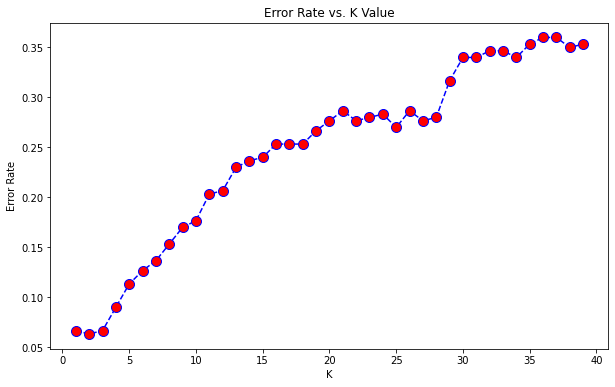

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_data,train_label)
 pred_i = knn.predict(test_data)
 error_rate.append(np.mean(pred_i != test_label))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('/content/drive/My Drive/Thesis/code/cm/knn_error.pdf',bbox_inches='tight')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9366666666666666 at K = 1


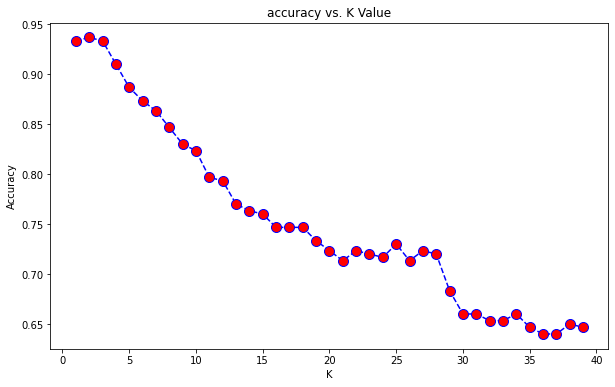

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(train_data,train_label)
    yhat = neigh.predict(test_data)
    acc.append(metrics.accuracy_score(test_label, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
plt.savefig('/content/drive/My Drive/Thesis/code/cm/knn_acc.pdf',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [28]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(train_data,train_label)
pred = kn.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.97      0.96      0.97       500
           2       0.97      0.98      0.98       500
           3       0.99      0.98      0.98       500

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [78]:
pred = kn.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1000
           1       0.90      0.97      0.93       999
           2       0.96      0.96      0.96      1000
           3       0.98      0.91      0.94      1000

    accuracy                           0.95      3999
   macro avg       0.95      0.95      0.95      3999
weighted avg       0.95      0.95      0.95      3999



In [79]:
kn.score(test_data,test_label)

0.9504876219054764

In [32]:
kn.score(valid_data,valid_label)

0.9641666666666666

In [80]:
scores = cross_val_score(kn, test_data, test_label, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.95375    0.96375    0.9625     0.9575     0.96370463]
Average cross-validation score: 0.9602409261576972


In [81]:
scores = cross_val_score(kn, test_data, test_label, cv=5, scoring='f1_macro')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.95386823 0.96374766 0.962487   0.95753389 0.96367117]
Average cross-validation score: 0.9602615897943944


##Prediction

In [65]:
def plot_confusion_matrix(cm,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes = ['B.1.1.7','B.1.351','P1','B.1.617.2']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.savefig('/content/drive/My Drive/Thesis/code/cm/new_cm/valid_svm_cm.png',bbox_inches='tight')


Confusion matrix, without normalization
[[278   3   4   0]
 [ 15 297   3   4]
 [  4   3 295   0]
 [  6   2   1 285]]


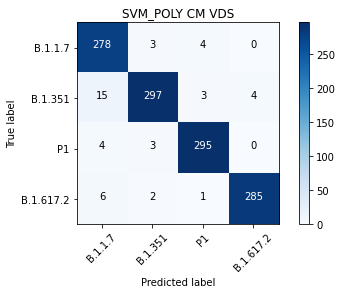

In [66]:
cm = confusion_matrix(y_true = valid_label, y_pred= pred)
plot_confusion_matrix(cm=cm, title='SVM_POLY CM VDS')